In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [5]:
df = pd.read_csv(r"C:\Users\abiden.sumia\Downloads\archive (1)\housing.csv")

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [9]:
from sklearn.model_selection import train_test_split
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

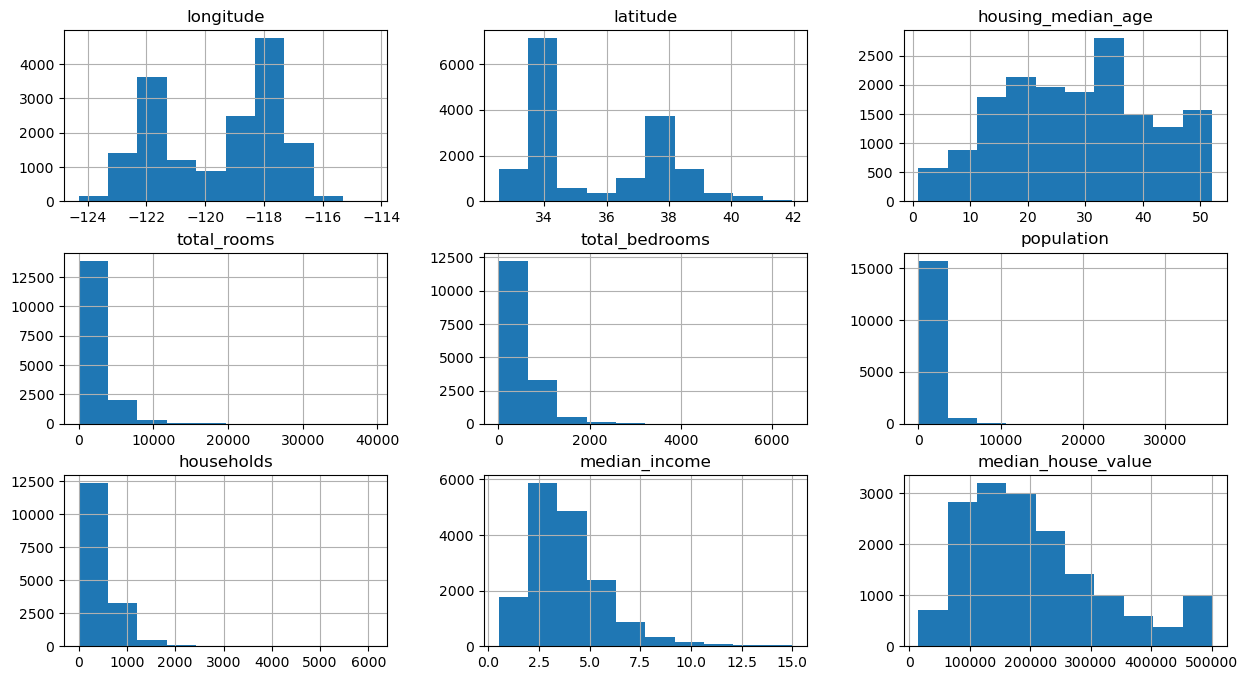

In [11]:
df_train = X_train.join(y_train)
df_train.hist(figsize=(15, 8))

C:\Users\abiden.sumia\AppData\Local\Temp\ipykernel_15224\1476244919.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")


<Axes: >

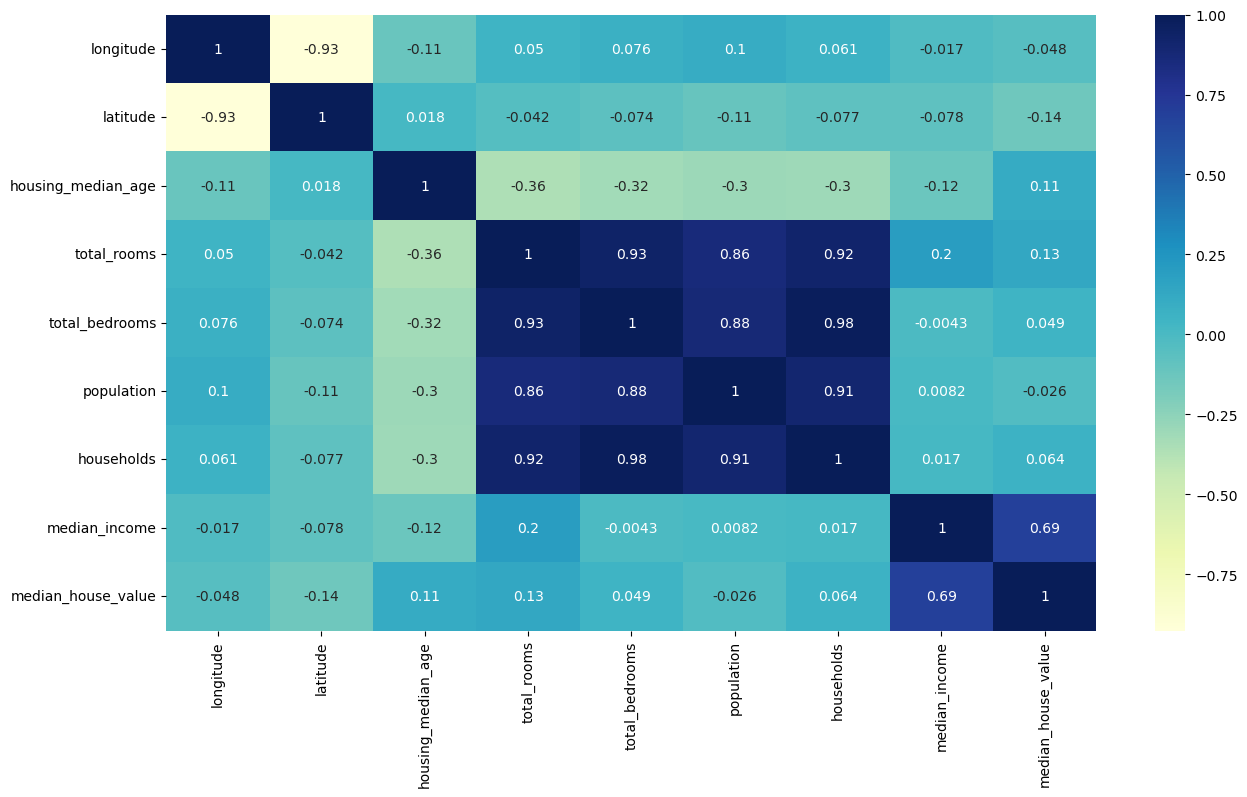

In [12]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

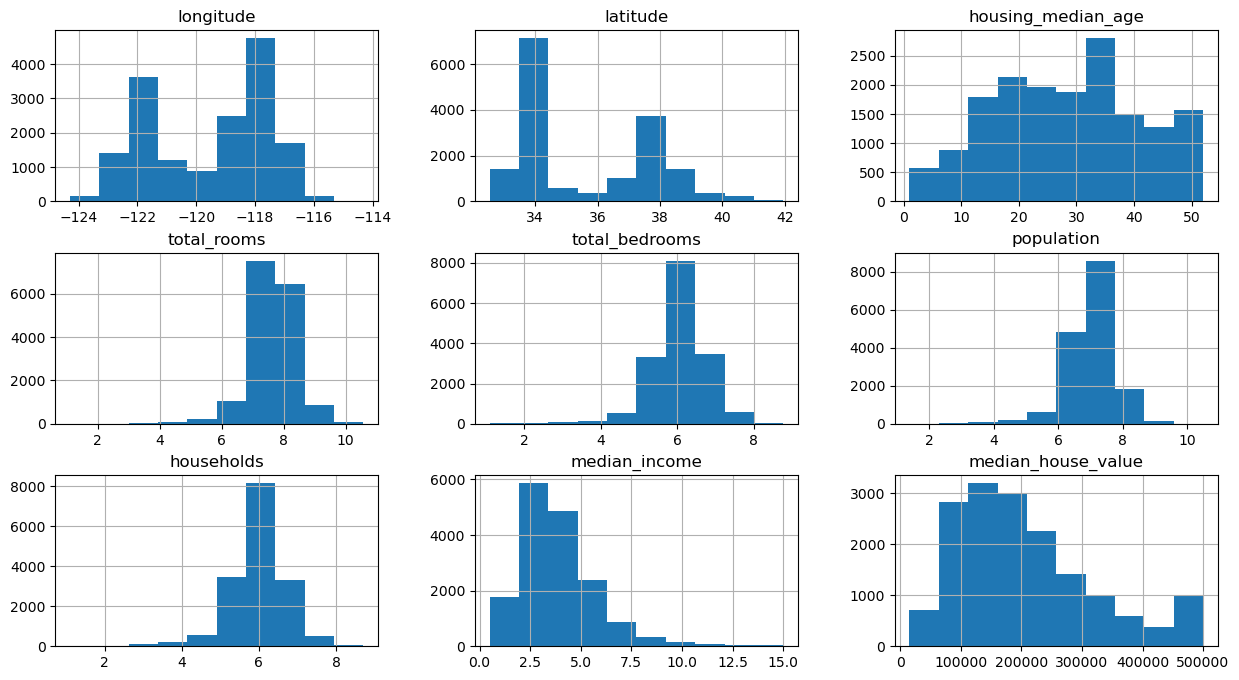

In [13]:
# Applying logarithmic transformation to certain columns in the dataset
# Adding one to avoid taking log of 0
df_train["total_rooms"] = np.log(df_train["total_rooms"] + 1)
df_train["total_bedrooms"] = np.log(df_train["total_bedrooms"] + 1)
df_train["population"] = np.log(df_train["population"] + 1)
df_train["households"] = np.log(df_train["households"] + 1)
df_train.hist(figsize=(15, 8))

In [14]:
# Turning ocean_proximity column values to numeric values
df_train["ocean_proximity"].value_counts()

<1H OCEAN     7271
INLAND        5158
NEAR OCEAN    2095
NEAR BAY      1820
ISLAND           2
Name: ocean_proximity, dtype: int64

In [15]:

# pd.get_dummies creates binary columns for each category in 'ocean_proximity'
# The original 'ocean_proximity' column is dropped after the encoding
df_train = df_train.join(pd.get_dummies(df_train.ocean_proximity)).drop(["ocean_proximity"], axis=1)



<Axes: >

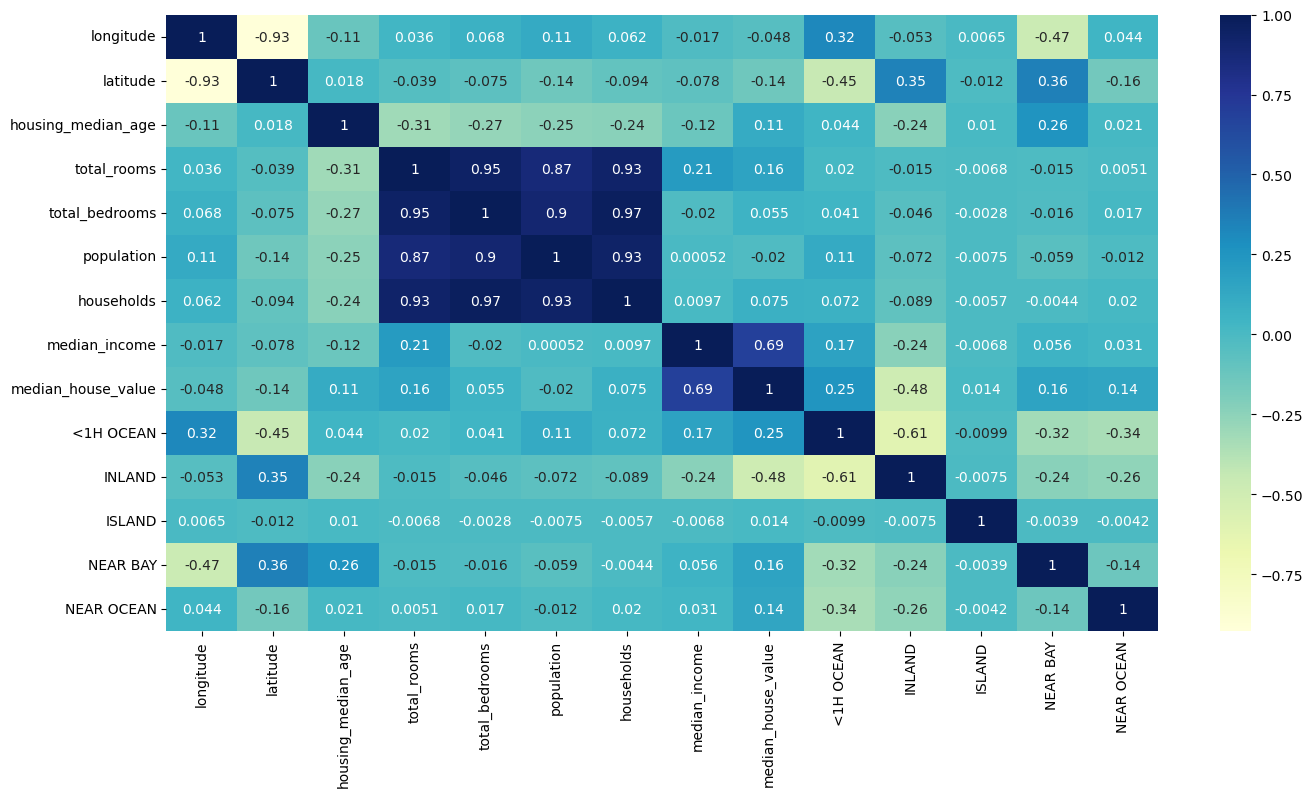

In [16]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

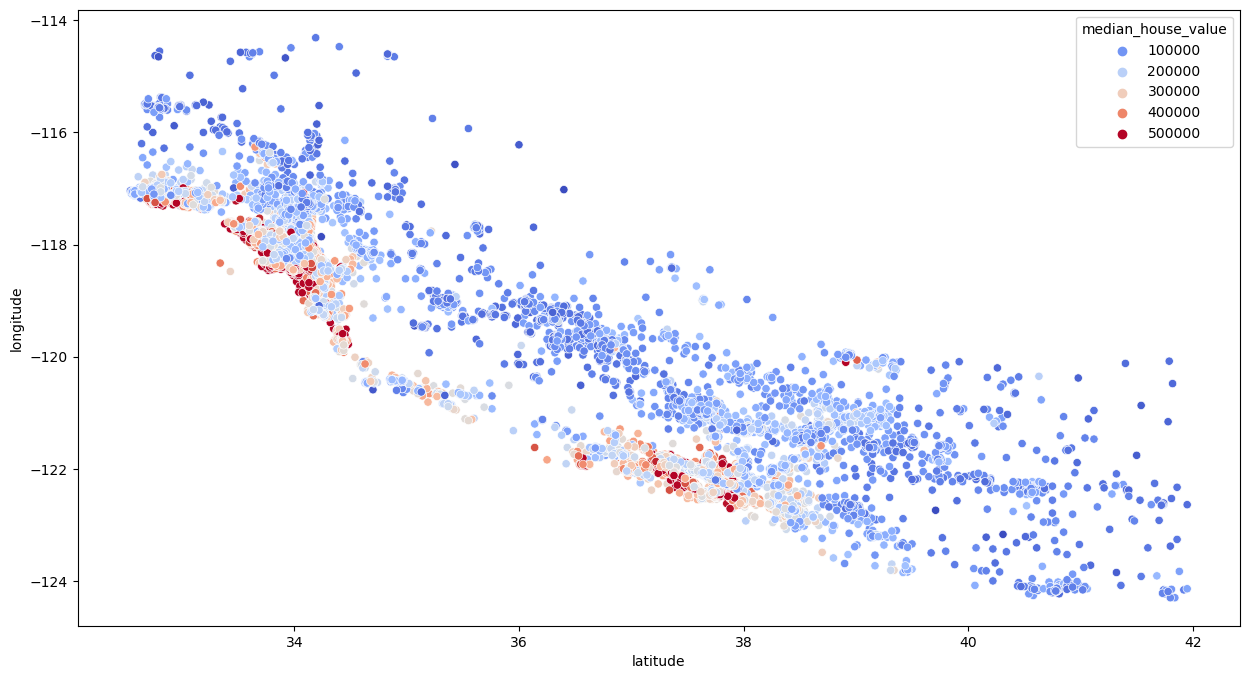

In [17]:
# We can imagine the graph below as it is the map of california
# From the graph below we can conclude that most houses on the coast are more expensive
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=df_train, hue="median_house_value", palette="coolwarm")


<Axes: >

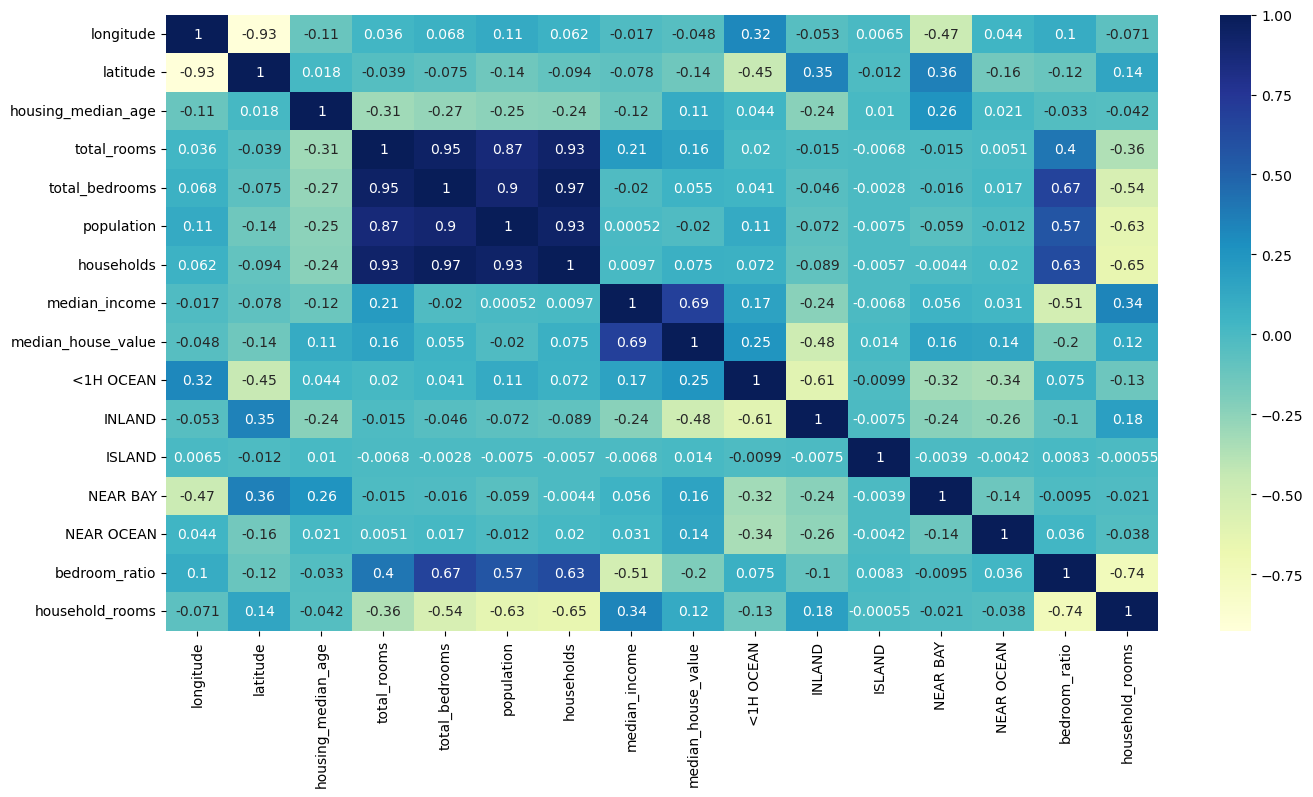

In [18]:
df_train["bedroom_ratio"] = df_train["total_bedrooms"] / df_train["total_rooms"]
df_train["household_rooms"] = df_train["total_rooms"] / df_train["households"]
plt.figure(figsize=(16, 8))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Dropping the 'median_house_value' column from X_train as it is the target variable(y_train)
X_train, y_train = df_train.drop(["median_house_value"], axis=1), df_train["median_house_value"]
X_train_s = scaler.fit_transform(X_train)
# Initialization of the Linear Regression model
reg = LinearRegression()

# Fit the model to the training data
# X_train contains the features, and y_train contains the target values
reg.fit(X_train_s, y_train)

LinearRegression()

In [21]:
df_test = X_test.join(y_test)

df_test["total_rooms"] = np.log(df_test["total_rooms"] + 1)
df_test["total_bedrooms"] = np.log(df_test["total_bedrooms"] + 1)
df_test["population"] = np.log(df_test["population"] + 1)
df_test["households"] = np.log(df_test["households"] + 1)

df_test = df_test.join(pd.get_dummies(df_test.ocean_proximity)).drop(["ocean_proximity"], axis=1)

df_test["bedroom_ratio"] = df_test["total_bedrooms"] / df_test["total_rooms"]
df_test["household_rooms"] = df_test["total_rooms"] / df_test["households"]

X_test, y_test = df_test.drop(["median_house_value"], axis=1), df_test["median_house_value"]
X_test_s = scaler.fit_transform(X_test)



In [22]:
# Evaluate the trained model's performance on the test set using the R² score
reg.score(X_test_s, y_test)

0.6724558590721933

In [23]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)
# Using the above way we got a higher accuracy

forest.fit(X_train_s, y_train)
forest.score(X_test_s, y_test)


0.799940920348871

In [24]:
# This will get us the optimal model
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 4, 8],
    "min_samples_split": [2, 4]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train_s, y_train)

best_forest = grid_search.best_estimator_

best_forest.score(X_test_s, y_test)

0.8012441638271912